In [1]:
from keras.layers import Embedding


In [2]:
from keras.datasets import imdb
from keras import preprocessing

In [3]:
max_features =  10000
maxlen = 20 # 리뷰의 최대 단어 20개만 뽑고 모자랄경우 0으로 남는경우 잘라내기하여 최대길이를 20개로 맞춤 


In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


17473536/17464789 [==============================] - 0s 0us/step


In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense


In [6]:
model = Sequential()

In [7]:
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))



In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 2s 2ms/step - loss: 0.6663 - acc: 0.6322 - val_loss: 0.6119 - val_acc: 0.7030
Epoch 2/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5375 - acc: 0.7507 - val_loss: 0.5217 - val_acc: 0.7326
Epoch 3/20
625/625 [==============================] - 1s 2ms/step - loss: 0.4597 - acc: 0.7866 - val_loss: 0.4983 - val_acc: 0.7450
Epoch 4/20
625/625 [==============================] - 1s 2ms/step - loss: 0.4210 - acc: 0.8073 - val_loss: 0.4934 - val_acc: 0.7512
Epoch 5/20
625/625 [==============================] - 1s 2ms/step - loss: 0.3934 - acc: 0.8235 - val_loss: 0.4944 - val_acc: 0.7522
Epoch 6/20
625/625 [==============================] - 1s 1ms/step - loss: 0.3715 - acc: 0.8360 - val_loss: 0.4993 - val_acc: 0.7534
Epoch 7/20
625/625 [==============================] - 1s 1ms/step - loss: 0.3517 - acc: 0.8471 - val_loss: 0.5068 - val_acc: 0.7534
Epoch 8/20
625/625 [==============================] - 1s 2ms/step - loss: 0.

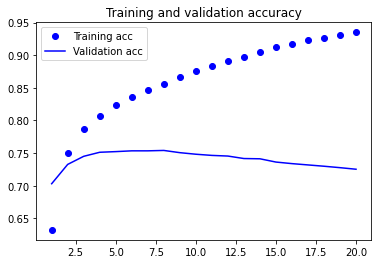

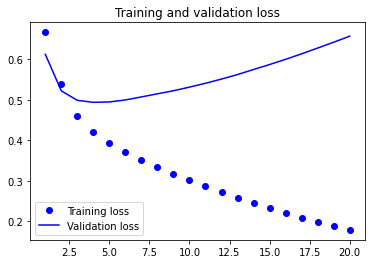

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()